입력 데이터 X의 크기: (10, 138)
평균 벡터 x_bar의 크기: (138,)
변환 행렬 U의 크기: (138, 40)
변환된 특징 벡터 y의 크기: (40,)
변환된 특징 벡터 y: [ 1.84975365e+00 -3.95936110e-01  6.53152150e-01  4.51088265e-02
  1.94330137e+00 -1.22536189e+00  1.64644588e-01 -4.58283939e-01
 -8.80139752e-01  1.49515789e-16 -3.83118150e-16 -4.64506143e-16
  1.61101453e-16  4.45223099e-17  1.14674404e-16 -4.47975044e-17
  1.97987218e-16 -6.26279265e-16  5.31106591e-16 -5.41071470e-17
 -1.12079609e-16 -4.36587506e-16  7.75950358e-17  1.23934836e-16
  9.46356875e-17 -3.82079703e-17  3.64612004e-17 -7.24972498e-17
  1.60203578e-16 -1.93234937e-16  5.56393932e-17  1.30851932e-16
 -1.73123866e-16  1.84682405e-17 -9.97170670e-17 -2.53837035e-16
  1.49788640e-16  1.50025119e-16  2.38686077e-17 -2.55778881e-17]


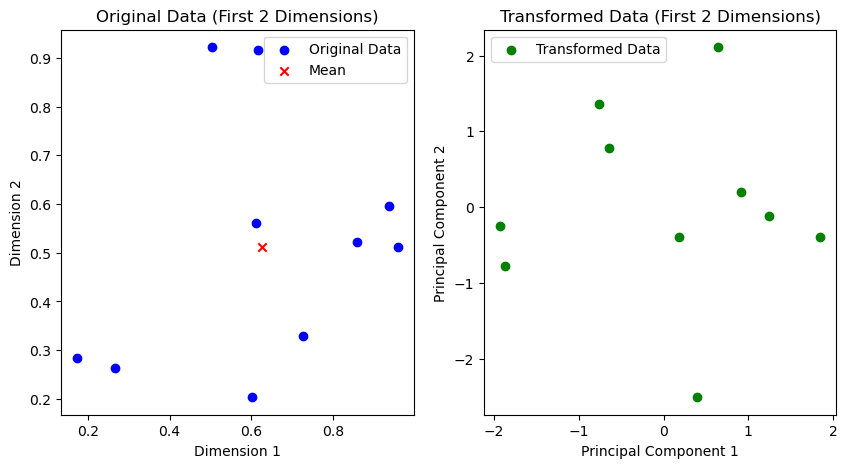

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 이전 단계에서 얻은 SIFT와 FFT 특징 벡터를 가정
# SIFT 특징 벡터 (예: 128차원, 10개 키포인트)
sift_descriptors = np.random.rand(10, 128)  # 예시 데이터
# FFT 특징 벡터 (예: 10차원)
fft_features = np.random.rand(10, 10)  # 예시 데이터

# SIFT와 FFT 특징 벡터 결합
X = np.hstack((sift_descriptors, fft_features))  # (10, 138) 크기의 데이터
n, d = X.shape  # n=10, d=138

# 알고리즘 6-3: PCA에 의한 변환 행렬 추정
def pca_transform_matrix(X, target_d=40):
    # 1. 평균 벡터 계산
    x_bar = np.mean(X, axis=0)  # (d,) 크기

    # 2. 각 데이터 벡터를 평균을 뺀 값으로 변환
    X_prime = X - x_bar  # (n, d) 크기

    # 3. 공분산 행렬 계산
    Sigma = np.cov(X_prime, rowvar=False)  # (d, d) 크기

    # 4. 고유 벡터와 고유값 계산
    eigenvalues, eigenvectors = np.linalg.eigh(Sigma)
    
    # 5. 고유값을 기준으로 고유 벡터 정렬 (내림차순)
    idx = np.argsort(eigenvalues)[::-1]  # 내림차순 정렬 인덱스
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # 상위 target_d개의 고유 벡터 선택
    U = eigenvectors[:, :target_d]  # (d, target_d) 크기

    # 6. 크기 (6, 40)에 맞게 변환 행렬 U 조정 (의사 코드에 따라)
    # 여기서는 d=138, target_d=40이므로 이미 적절한 크기
    # 만약 특정 크기 (6, 40)이 필요하다면 추가 조정 필요
    return U, x_bar

# 알고리즘 6-4: PCA에 의한 특징 추출
def pca_extract_features(U, x_bar, x):
    # 1. 입력 벡터 x를 평균을 뺀 값으로 변환
    x_prime = x - x_bar

    # 2. 변환 행렬 U를 사용해 y 계산
    y = U.T @ x_prime  # (target_d,) 크기
    return y

# PCA 수행
target_d = 40  # 목표 차원 (의사 코드에서 40으로 설정)
U, x_bar = pca_transform_matrix(X, target_d)

# 새로운 벡터 x에 대해 특징 추출 (예: X의 첫 번째 벡터 사용)
x = X[0]  # (d,) 크기
y = pca_extract_features(U, x_bar, x)

# 결과 출력
print(f"입력 데이터 X의 크기: {X.shape}")
print(f"평균 벡터 x_bar의 크기: {x_bar.shape}")
print(f"변환 행렬 U의 크기: {U.shape}")
print(f"변환된 특징 벡터 y의 크기: {y.shape}")
print(f"변환된 특징 벡터 y: {y}")

# 시각화 (Matplotlib 사용)
# 원본 데이터와 변환된 데이터의 분포 시각화
plt.figure(figsize=(10, 5))

# 원본 데이터 X의 첫 두 차원 시각화
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Original Data')
plt.scatter(x_bar[0], x_bar[1], c='red', marker='x', label='Mean')
plt.title('Original Data (First 2 Dimensions)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()

# 변환된 데이터 y의 첫 두 차원 시각화
# 모든 데이터에 대해 PCA 적용
Y = np.array([pca_extract_features(U, x_bar, x_i) for x_i in X])
plt.subplot(1, 2, 2)
plt.scatter(Y[:, 0], Y[:, 1], c='green', label='Transformed Data')
plt.title('Transformed Data (First 2 Dimensions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()